# Fashion-MNIST-Sequential
In this case a NN is built using pytorch with a sequential container. According to the official documentation, modules (tensors) are added to it in the order they are passed in the constructor (operations).

Using the sequential module it is not necessary to define a class with the architecture as used with the functional module, so it is a bit simpler.

### Importing the libraries and loading the data

In [0]:
# Importing libraries
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
import helper
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

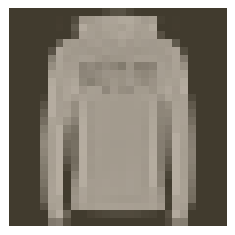

In [2]:
#Viewing the images
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

### Defining the architecture of the network using nn.sequential

In [0]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [256, 128]
output_size = 10
# Feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),                  
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
# Define the loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

### Train the network 

In [4]:
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)    
        #Training
        #print('Initial weights - ', model[0].weight)
        images, labels = next(iter(trainloader))
        images.resize_(64, 784)
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        # Forward pass, then backward pass, then update weights
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        #print('Gradient -', model[0].weight.grad)        
        # Take an update step and few the new weights
        optimizer.step()
        #print('Updated weights - ', model[0].weight)        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.2980017084429767
Training loss: 0.654158822445473
Training loss: 0.5666466496710075
Training loss: 0.5187913547478505
Training loss: 0.4880380675450825
Training loss: 0.4624797854818769
Training loss: 0.4432858766904518
Training loss: 0.43070789107254576
Training loss: 0.42421306458426944
Training loss: 0.413246836854832
Training loss: 0.40183819037701274
Training loss: 0.39699845087490104
Training loss: 0.38548803397778003
Training loss: 0.3796293525648778
Training loss: 0.37051387962057136


### Forward test data to calculate accuracy

In [21]:
#Forward pass with 1 batch of images from the test dataset
images, labels = next(iter(testloader))
images.resize_(64, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    ps1 = model(images)
# Get the class probabilities
ps = torch.exp(ps1)
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)


torch.Size([64, 10])


In [22]:
#To obtain the class with the highest probability using method ps.topk
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[3],
        [9],
        [1],
        [3],
        [7],
        [9],
        [2],
        [9],
        [6],
        [2]])


In [0]:
#Now we want to check that the class obtained in the probabilities with the model correspond to the labels
#It can be done equationg top_class=labels but we need to be sure that they are the same shape.
# Equals must have the size (64,64)
equals = top_class == labels.view(*top_class.shape)

In [24]:
#To get the accuracy. 
#Equals is in the form of 0s and 1s, so the total sum divided by the total size of items gives the accuracy.
#Accuracy is a mean of how much the model got right
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 87.5%


### To print the results

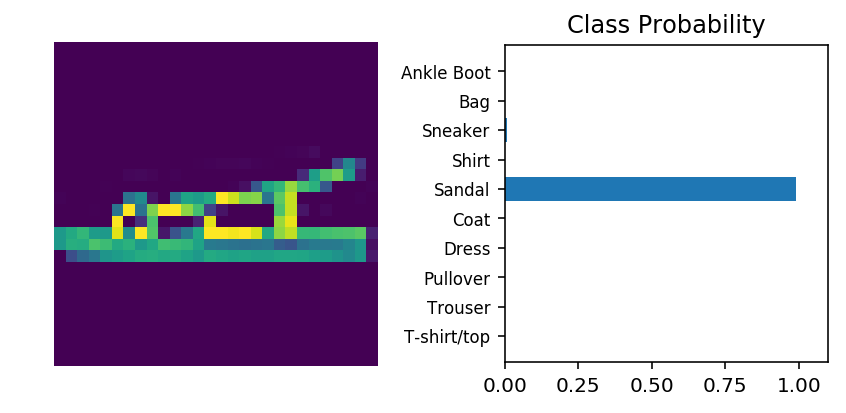

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
images, labels = next(iter(testloader))
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
# Calculate the class probabilities (softmax) for img    
ps = F.softmax(logits, dim=1)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')